# SiGMaFlow test for KRAS

## 0. Parameters

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.sigmaflow import SiGMaFlow

d:\softwares\miniconda3\envs\pygm\Lib\site-packages\Bio\Application\__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
ref = "../data/ref.pdb"
top = "../data/strip.top"
traj = "../data/strip.nc"

In [3]:
sigmaflow = SiGMaFlow(topology=top, trajectory=traj, reference=ref)

## 1. Prepare

In [4]:
sigmaflow.prepare()

INFO:root:[~] Loading trajectory from ../data/strip.nc and processing reference structure from ../data/ref.pdb.
INFO:MDAnalysis.core.universe:The attribute(s) types, masses have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not guess any new values for masses attribute


## 2. Compute

In [5]:
sigmaflow.computePhysicalQuantities(physical_quantities = ["Dihedrals", "RMSF", "PCA", "DCCM"])

INFO:root:[~] Computing Dihedrals... Result will store into self.df_dihedrals
INFO:MDAnalysis.analysis.base:Choosing frames to analyze
INFO:MDAnalysis.analysis.base:Starting preparation
INFO:MDAnalysis.analysis.base:Finishing up
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\analysis\dihedrals.py:337: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)
INFO:MDAnalysis.analysis.base:Choosing frames to analyze
INFO:MDAnalysis.analysis.base:Starting preparation
INFO:MDAnalysis.analysis.base:Finishing up
INFO:MDAnalysis.analysis.base:Choosing frames to analyze
INFO:MDAnalysis.analysis.base:Starting preparation
INFO:MDAnalysis.analysis.base:Finishing up
INFO:root:[~] Computing RMSF... Result will store into self.df_rmsf
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\core\universe.py:743: UserWarning: Reader has no dt 

In [6]:
sigmaflow.computeContactFrequency(dist=5.0, heavy_atoms=["C","N","O","S"])

INFO:root:[~] Computing Residue contact frequency... Result will store into self.df_contact
Computing contact frequency: 100%|██████████| 100/100 [00:09<00:00, 11.08it/s]


In [7]:
sigmaflow.computeNMI(n_bins=72, average_method="geometric")

INFO:root:[~] Computing Dihedrals NMI... Result will store into self.df_nmi_phi, self.df_nmi_psi, self.df_nmi_chi1
INFO:root:[~] Phi...
INFO:root:[~] Psi...
INFO:root:[~] Chi1...


In [8]:
sigmaflow.computeIntegratedNMI(weights=[0.1, 0.1, 0.8])

In [9]:
sigmaflow.computeEdgeWeight()

## 3. Graph

In [10]:
sigmaflow.graphBuild()

## 4. Application

In [11]:
dict_dccm_clusters = sigmaflow.appClusterDCCM(num_cluster=10, threshold=0.5)
print(dict_dccm_clusters)

{1: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 113, 114, 115, 116, 117, 118, 119, 120, 121, 140, 141, 142, 143, 145, 146, 150], 2: [9, 10], 3: [144], 4: [62, 63, 64, 65, 66, 70], 5: [147, 148, 149], 6: [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 138, 139], 7: [67, 68, 69], 8: [57, 58, 59, 60, 61], 9: [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137], 10: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]}


d:\softwares\miniconda3\envs\pygm\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [12]:
df_path_btw_regions = sigmaflow.appPathwayBtwRegions(region1=[56,57,58,59,60,61,62], region2=[89,84,85,86,87,88,89,90,91,92])
df_path_btw_regions

,Resid1,Resid2,path,length,strength
0,56,89,"[56, 8, 79, 81, 83, 84, 86, 89]",16.123545,0.436628
1,56,84,"[56, 8, 79, 81, 83, 84]",11.760681,0.427619
2,56,85,"[56, 8, 79, 81, 83, 85]",12.350072,0.405993
3,56,86,"[56, 8, 79, 81, 83, 84, 86]",13.854686,0.435942
4,56,87,"[56, 8, 79, 81, 83, 84, 87]",14.292461,0.422179
...,...,...,...,...,...
65,62,88,"[62, 60, 58, 8, 79, 81, 83, 84, 88]",19.220579,0.420604
66,62,89,"[62, 60, 58, 8, 79, 81, 83, 84, 86, 89]",20.583376,0.438867
67,62,90,"[62, 60, 58, 8, 79, 81, 83, 84, 86, 90]",21.026253,0.430869
68,62,91,"[62, 60, 58, 8, 79, 81, 83, 84, 87, 91]",22.236166,0.412613


In [13]:
df_path_to_distant = sigmaflow.appPathwayToDistant(region1=[71], dist_threshold=10)
df_path_to_distant

,Resid1,Resid2,path,length,strength
0,1,71,"[1, 3, 73, 71]",6.944042,0.435343
1,2,71,"[2, 3, 73, 71]",7.843192,0.385811
2,3,71,"[3, 73, 71]",4.893004,0.409236
3,4,71,"[4, 3, 73, 71]",7.762369,0.388994
4,5,71,"[5, 3, 73, 71]",7.732343,0.390222
...,...,...,...,...,...
144,71,163,"[71, 72, 74, 108, 109, 138, 139, 141, 149, 151...",34.947515,0.356858
145,71,164,"[71, 72, 74, 108, 109, 138, 139, 141, 149, 151...",37.459074,0.360035
146,71,165,"[71, 72, 74, 108, 109, 138, 139, 141, 149, 151...",37.074614,0.365571
147,71,166,"[71, 72, 74, 108, 109, 138, 139, 141, 149, 151...",37.843609,0.355968


In [14]:
df_path_btw_DccmClusters = sigmaflow.appPathwayBtwDccmClusters(cluster1=1, cluster2=2)
df_path_btw_DccmClusters

,Resid1,Resid2,path,length,strength
0,24,9,"[24, 19, 15, 13, 11, 9]",12.687171,0.403629
1,24,10,"[24, 19, 15, 14, 12, 10]",11.413426,0.444672
2,25,9,"[25, 23, 19, 15, 13, 11, 9]",14.556424,0.422173
3,25,10,"[25, 23, 19, 15, 14, 12, 10]",13.282678,0.456376
4,26,9,"[26, 24, 19, 15, 13, 11, 9]",14.549194,0.425866
5,26,10,"[26, 24, 19, 15, 14, 12, 10]",13.275449,0.460068
6,27,9,"[27, 26, 24, 19, 15, 13, 11, 9]",16.351625,0.444286
7,27,10,"[27, 26, 24, 19, 15, 14, 12, 10]",15.077880,0.473602
8,28,9,"[28, 26, 24, 19, 15, 13, 11, 9]",16.756214,0.429756
9,28,10,"[28, 26, 24, 19, 15, 14, 12, 10]",15.482468,0.459073


In [15]:
df_PC1_select = sigmaflow.appDominantMotion(out_dir="PCA_motion", target="PC1", rank=0.05)
df_PC1_select

INFO:root:[~] PCA Dominant Motion, will export PDBs into directory: PCA_motion
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\core\universe.py:743: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,
INFO:MDAnalysis.analysis.align:Moved mobile trajectory to in-memory representation
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr:

,PC1,frame
0,-19.415798,86
50,1.717042,46
99,19.916022,19


In [16]:
df_PC2_select = sigmaflow.appDominantMotion(out_dir="PCA_motion", target="PC2", rank=0.05)
df_PC2_select

INFO:root:[~] PCA Dominant Motion, will export PDBs into directory: PCA_motion
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\core\universe.py:743: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,
INFO:MDAnalysis.analysis.align:Moved mobile trajectory to in-memory representation
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
d:\softwares\miniconda3\envs\pygm\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr:

,PC2,frame
0,-23.201658,1
50,4.227134,27
99,9.627868,50


## 5. Plot

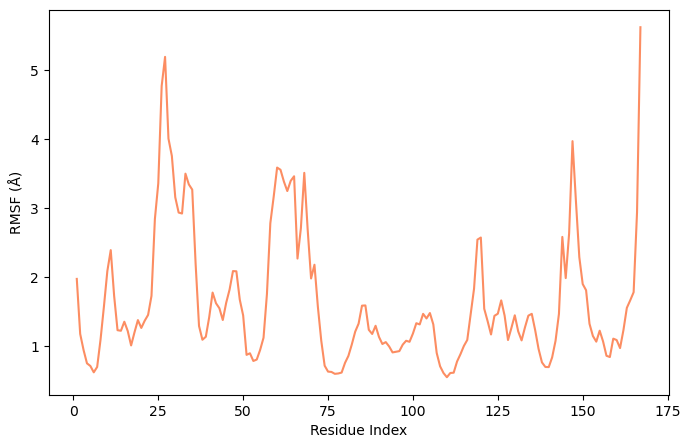

In [17]:
sigmaflow.plotLine(obj="rmsf")

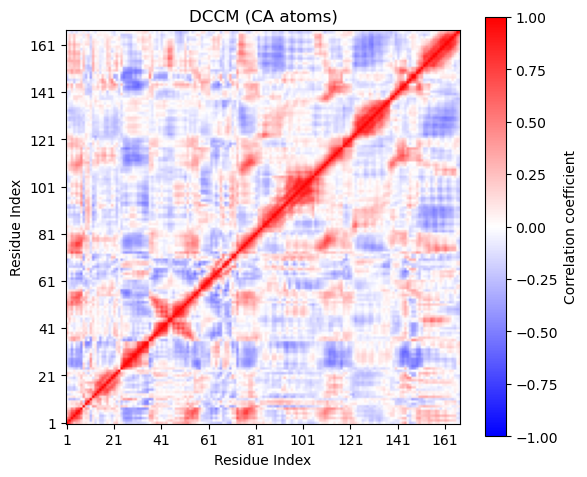

In [18]:
sigmaflow.plotHeatmap(obj="dccm")

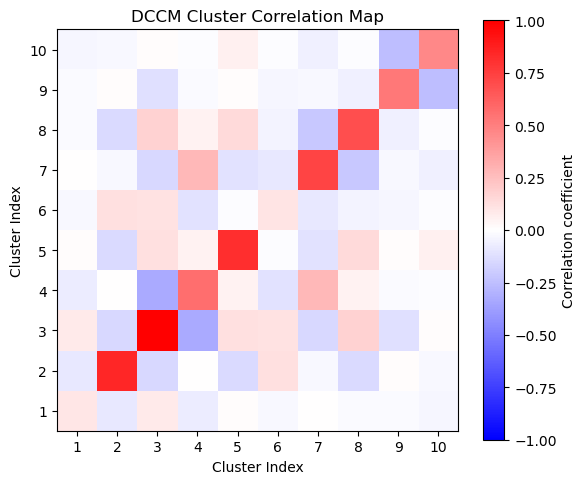

In [19]:
sigmaflow.plotHeatmap(obj="dccm_corr")

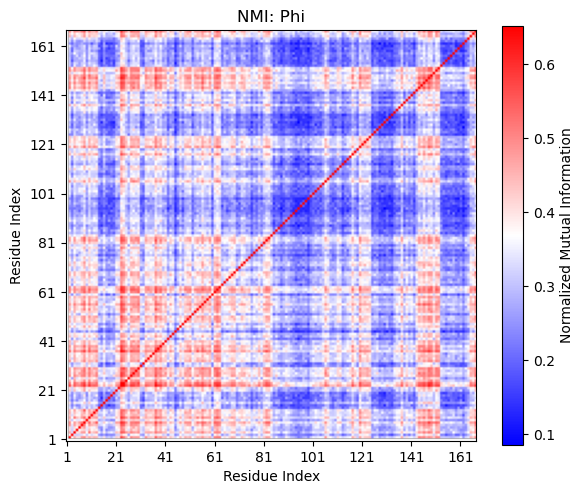

In [20]:
sigmaflow.plotHeatmap(obj="nmi_phi")

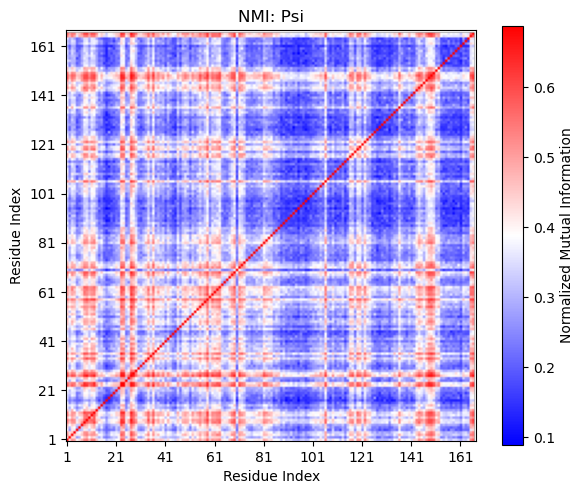

In [21]:
sigmaflow.plotHeatmap(obj="nmi_psi")

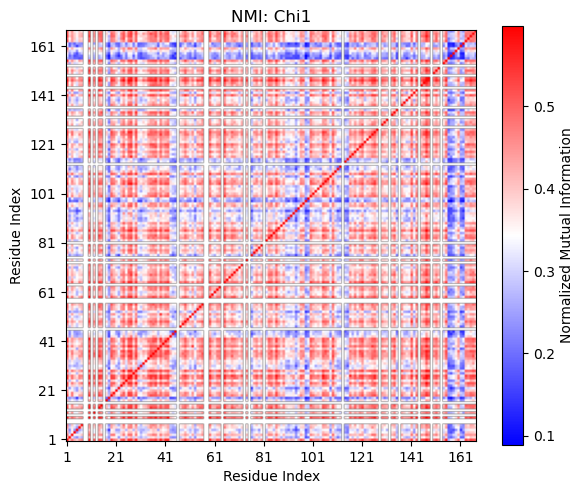

In [22]:
sigmaflow.plotHeatmap(obj="nmi_chi1")

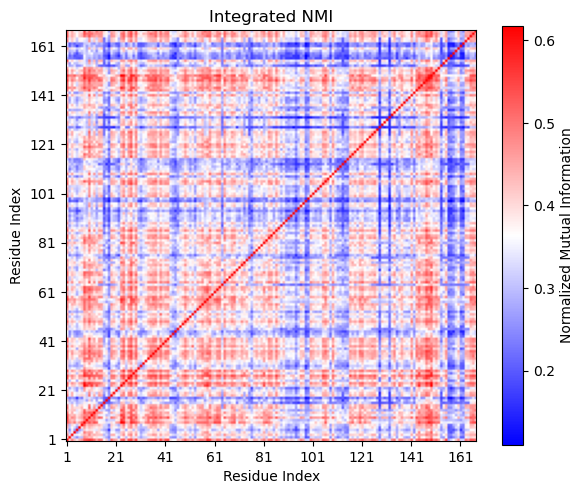

In [23]:
sigmaflow.plotHeatmap(obj="nmi")

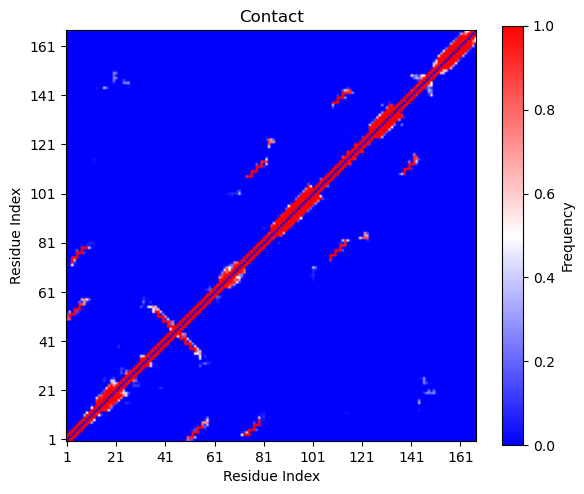

In [24]:
sigmaflow.plotHeatmap(obj="contact")

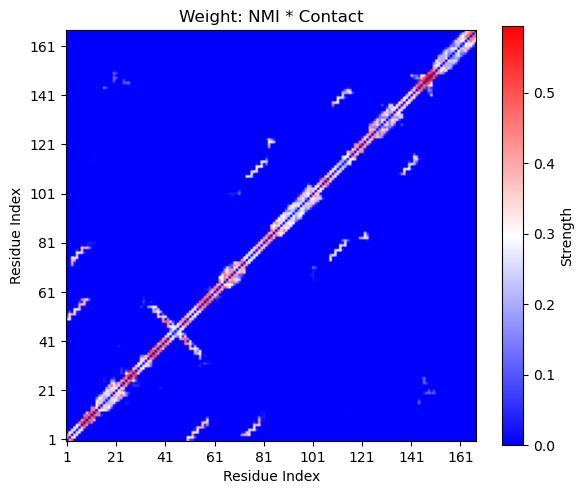

In [25]:
sigmaflow.plotHeatmap(obj="weight")

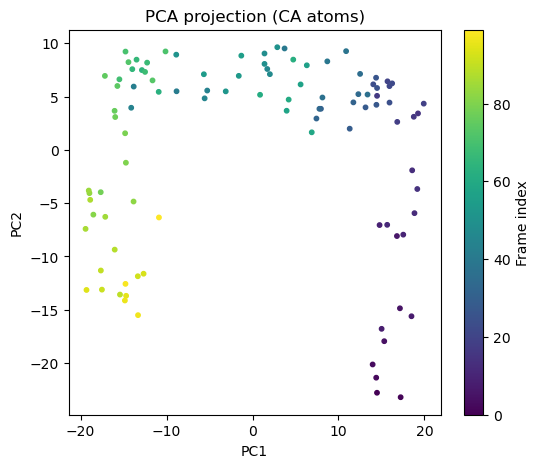

In [26]:
sigmaflow.plotScatter(obj="pca")

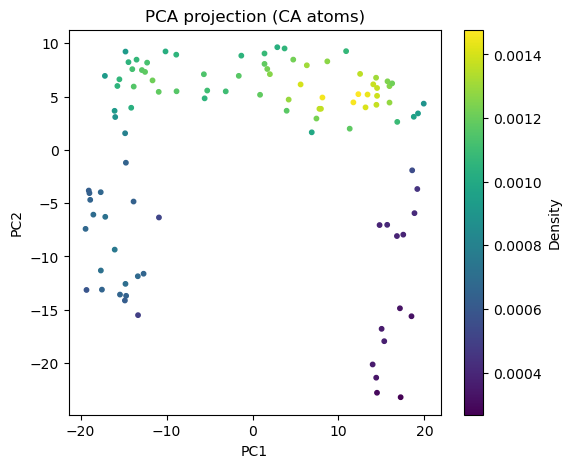

In [27]:
sigmaflow.plotScatter(obj="pca", color_strategy="density")

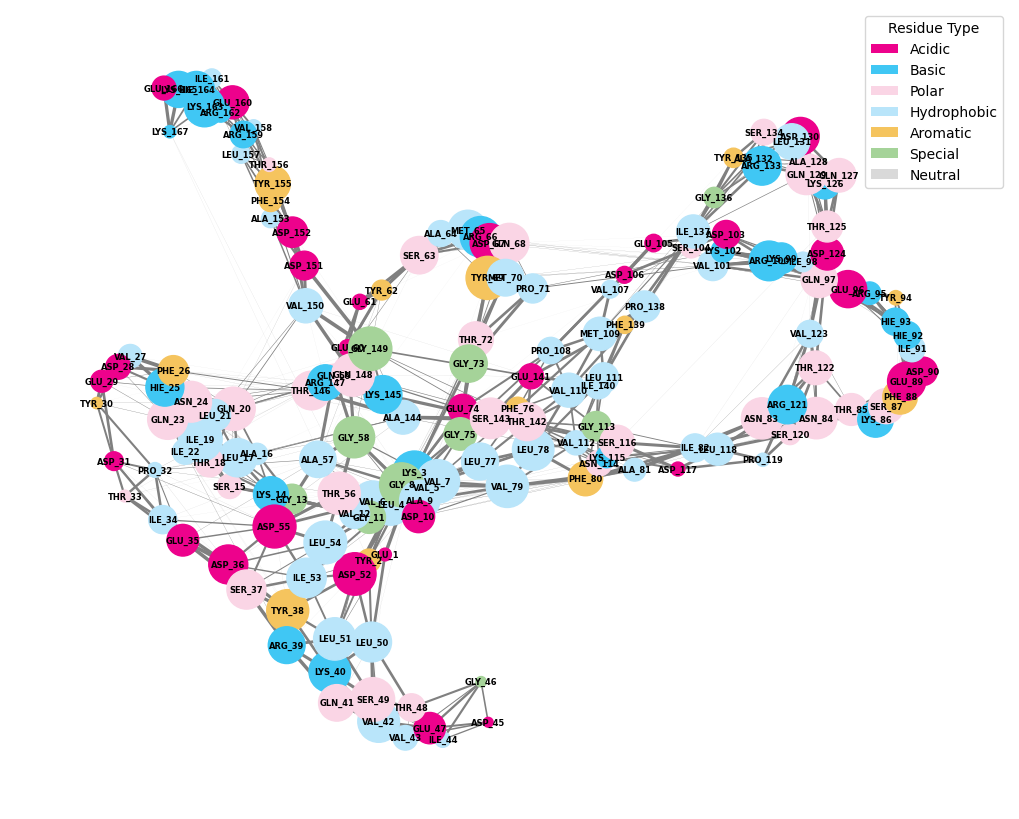

In [28]:
sigmaflow.plotGraph()

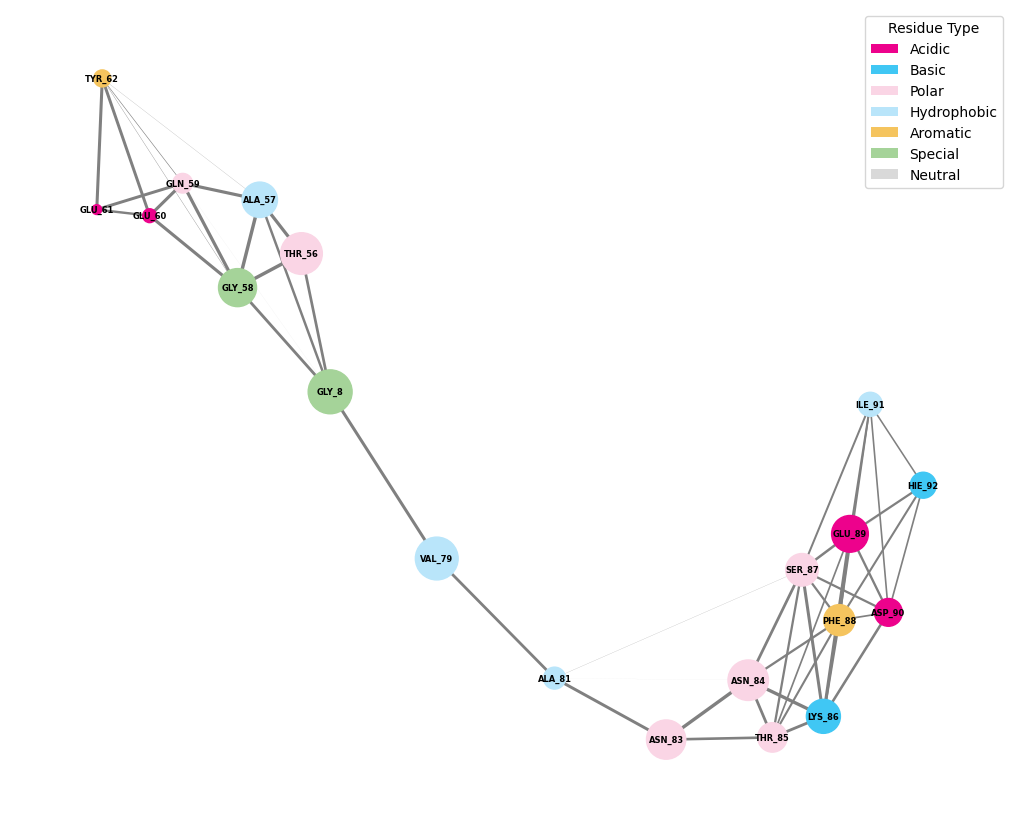

In [29]:
sigmaflow.plotGraph(df_paths_filtered=df_path_btw_regions)

In [30]:
len(sigmaflow.dict_dccm_clusters.keys())

10

In [31]:
sigmaflow.dict_dccm_clusters.items()

dict_items([(1, [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 113, 114, 115, 116, 117, 118, 119, 120, 121, 140, 141, 142, 143, 145, 146, 150]), (2, [9, 10]), (3, [144]), (4, [62, 63, 64, 65, 66, 70]), (5, [147, 148, 149]), (6, [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 138, 139]), (7, [67, 68, 69]), (8, [57, 58, 59, 60, 61]), (9, [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]), (10, [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])])

In [32]:
sigmaflow.df_rmsf

,rmsf,resid
0,1.970217,1
1,1.173030,2
2,0.938985,3
3,0.746814,4
4,0.708457,5
...,...,...
162,1.550565,163
163,1.660273,164
164,1.777207,165
165,2.934402,166


In [33]:
import matplotlib.pyplot as plt

def get_rgb(idx):
        rgb = plt.get_cmap("RdBu_r")(idx)[:3]
        rgb = f"[{rgb[0]:.3f}, {rgb[1]:.3f}, {rgb[2]:.3f}]"
        return rgb

get_rgb(100)

'[0.800, 0.888, 0.936]'

In [34]:
df_paths = df_path_btw_DccmClusters
df_paths["path_id"] = "path_" + df_paths["Resid1"].astype(str) + "_" + df_paths["Resid2"].astype(str)
df_paths

,Resid1,Resid2,path,length,strength,path_id
0,24,9,"[24, 19, 15, 13, 11, 9]",12.687171,0.403629,path_24_9
1,24,10,"[24, 19, 15, 14, 12, 10]",11.413426,0.444672,path_24_10
2,25,9,"[25, 23, 19, 15, 13, 11, 9]",14.556424,0.422173,path_25_9
3,25,10,"[25, 23, 19, 15, 14, 12, 10]",13.282678,0.456376,path_25_10
4,26,9,"[26, 24, 19, 15, 13, 11, 9]",14.549194,0.425866,path_26_9
5,26,10,"[26, 24, 19, 15, 14, 12, 10]",13.275449,0.460068,path_26_10
6,27,9,"[27, 26, 24, 19, 15, 13, 11, 9]",16.351625,0.444286,path_27_9
7,27,10,"[27, 26, 24, 19, 15, 14, 12, 10]",15.077880,0.473602,path_27_10
8,28,9,"[28, 26, 24, 19, 15, 13, 11, 9]",16.756214,0.429756,path_28_9
9,28,10,"[28, 26, 24, 19, 15, 14, 12, 10]",15.482468,0.459073,path_28_10


## 6. Visualize

In [35]:
sigmaflow.visRmsfPymol(outfile="rmsf_vis.pml", cmap="coolwarm", midpoint=2, half_range=1)

In [36]:
sigmaflow.visDccmClusterPymol(outfile="dccm_vis.pml")

In [37]:
# import pickle
# with open("sigmaflow_obj.pkl", "wb") as f:
#     pickle.dump(sigmaflow, f)

# with open("df_path.pkl", "wb") as f:
#     pickle.dump(df_path_btw_DccmClusters, f)

In [38]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.sigmaflow import SiGMaFlow

import pickle

with open("sigmaflow_obj.pkl", "rb") as f:
    sigmaflow = pickle.load(f)

with open("df_path.pkl", "rb") as f:
    df_path_btw_DccmClusters = pickle.load(f)

In [39]:
sigmaflow.visMotionChimeraX(obj1="#1", obj2="#2", outfile="motion_vis_chimeraX.py", cone_color="#fde725")

In [40]:
sigmaflow.visMotionPymol(obj1="PC1_0", obj2="PC1_2", outfile="motion_vis.py", cone_color="#fde725")

In [41]:
dict_coords = sigmaflow.visPathPreprocess(df_paths=df_path_btw_DccmClusters, outfile="path_dict.json")
sigmaflow.visPathChimeraX(dict_coords=dict_coords, outfile="path_vis.cxc")

In [42]:
sigmaflow.visDccmClusterChimeraX(outfile="dccm_vis.cxc")

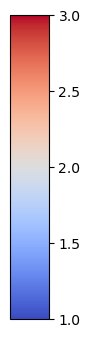

In [43]:
sigmaflow.visRmsfColorbar(outfile="colorbar", midpoint=2, half_range=1, n_break=5)

In [44]:
sigmaflow.visRmsfChimeraX(outfile="rmsf_vis.cxc", cmap="coolwarm", midpoint=2, half_range=1)

In [45]:
dict_coords = sigmaflow.visPathPreprocess(df_paths=df_path_btw_DccmClusters, outfile="path_dict.json")

In [46]:
sigmaflow.visPathPymol(dict_coords=dict_coords, outfile="path_vis.py")

In [47]:
df_path_btw_DccmClusters

,Resid1,Resid2,path,length,strength,path_id
0,24,9,"[24, 19, 15, 13, 11, 9]",12.687171,0.403629,path_24_9
1,24,10,"[24, 19, 15, 14, 12, 10]",11.413426,0.444672,path_24_10
2,25,9,"[25, 23, 19, 15, 13, 11, 9]",14.556424,0.422173,path_25_9
3,25,10,"[25, 23, 19, 15, 14, 12, 10]",13.282678,0.456376,path_25_10
4,26,9,"[26, 24, 19, 15, 13, 11, 9]",14.549194,0.425866,path_26_9
5,26,10,"[26, 24, 19, 15, 14, 12, 10]",13.275449,0.460068,path_26_10
6,27,9,"[27, 26, 24, 19, 15, 13, 11, 9]",16.351625,0.444286,path_27_9
7,27,10,"[27, 26, 24, 19, 15, 14, 12, 10]",15.077880,0.473602,path_27_10
8,28,9,"[28, 26, 24, 19, 15, 13, 11, 9]",16.756214,0.429756,path_28_9
9,28,10,"[28, 26, 24, 19, 15, 14, 12, 10]",15.482468,0.459073,path_28_10
